In [97]:
import cv2
import os
import joblib
import math
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import random
import shutil
import pathlib
import itertools
import math
import datetime as dt
import matplotlib.dates as mdates
from skimage.transform import resize
from matplotlib.pyplot import imshow
from IPython.display import clear_output
import concurrent.futures
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from keras import models
from keras import layers
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import ResNet50
from IPython.core.display import Image
from tensorflow.keras.applications import VGG16
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model, Model
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam, SGD
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import LSTM, Dense, Dropout
from imblearn.over_sampling import RandomOverSampler 
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier,XGBRegressor
import textwrap as tw
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import tensorflow_datasets as tfds
from PIL import Image, ImageEnhance
import multiprocessing
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn import *

In [7]:
hf = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [10]:
hf.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [11]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
hf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

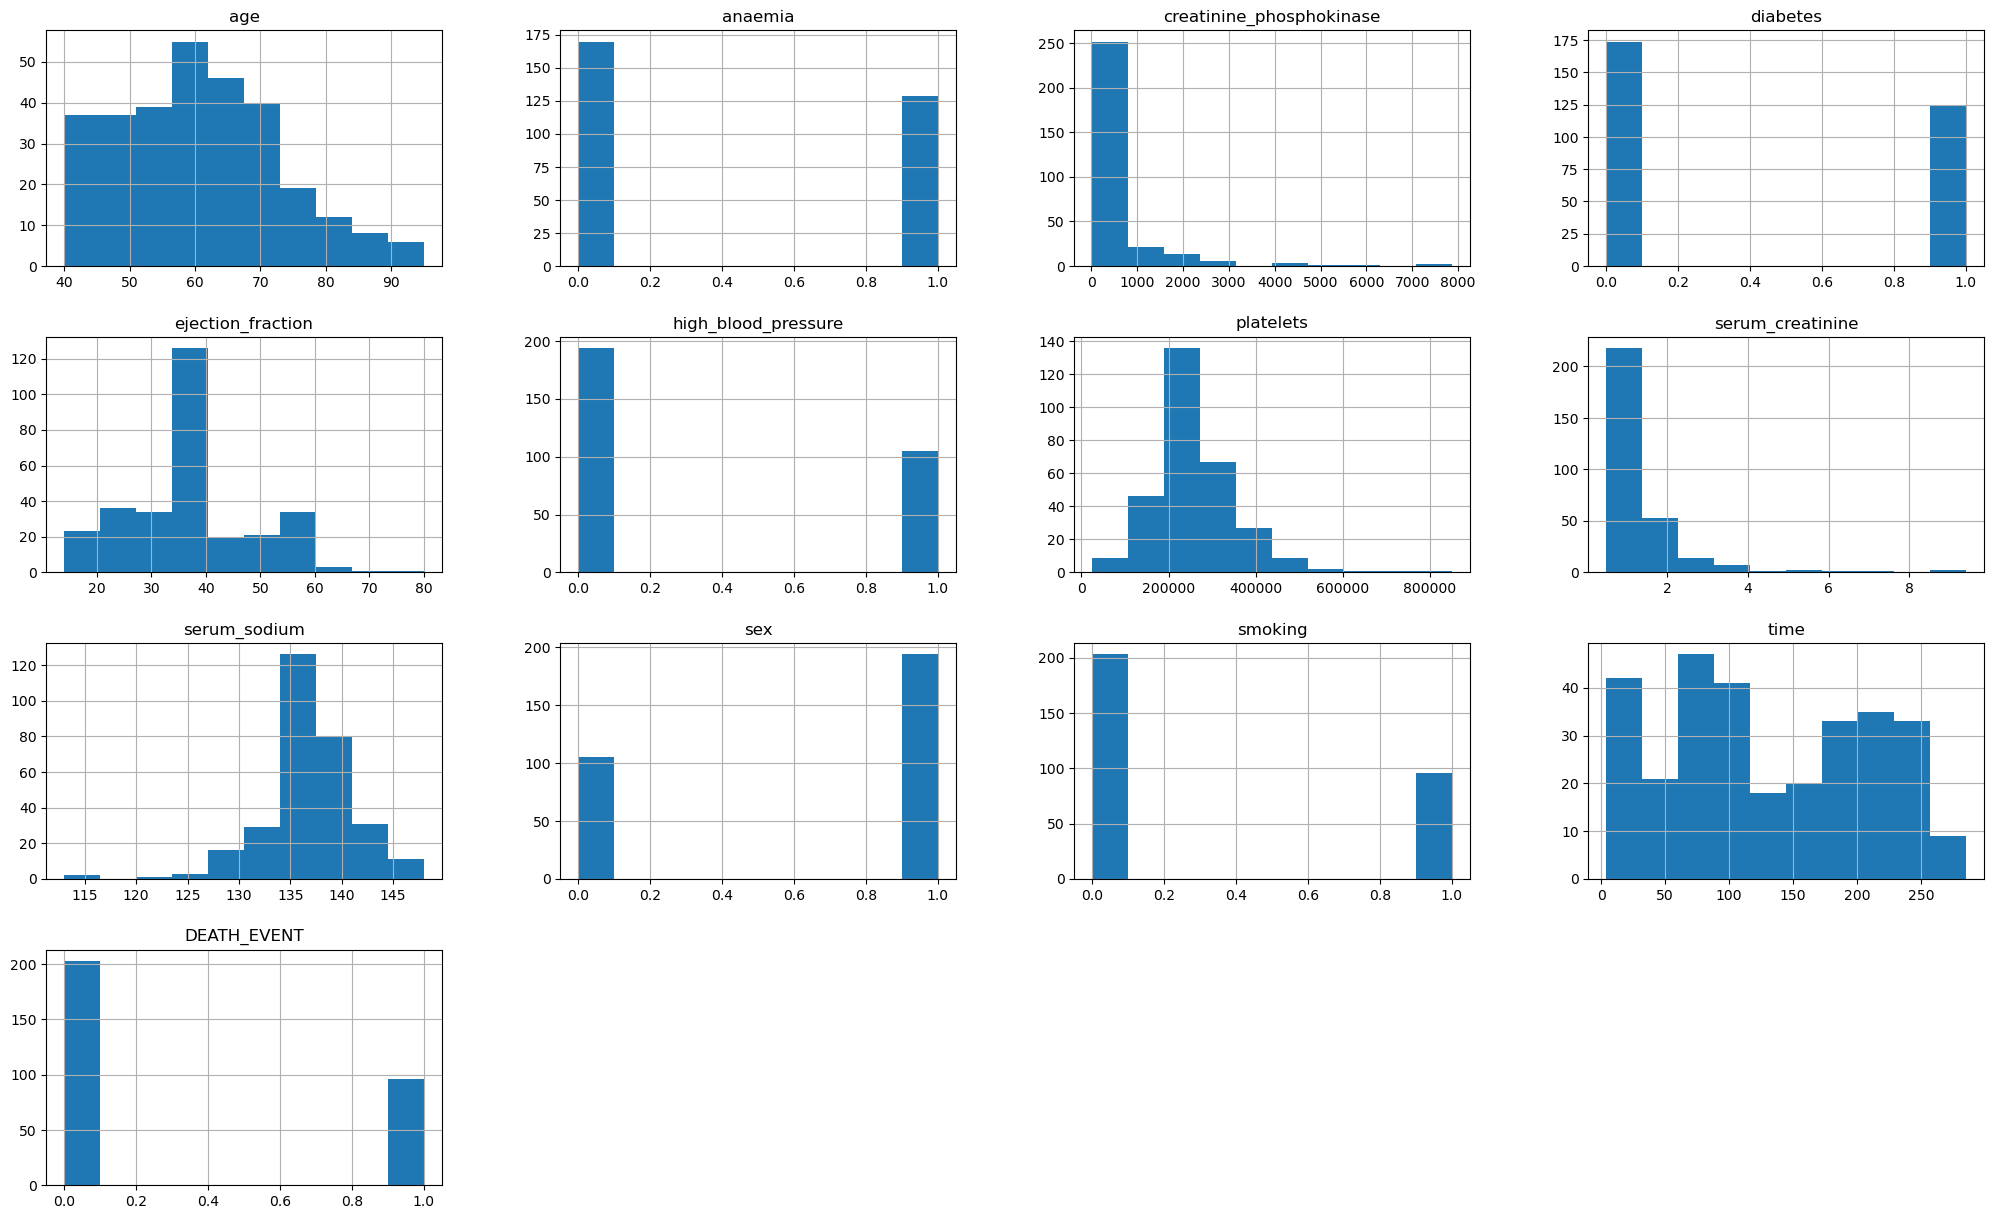

In [16]:
hf.hist(figsize=(25,15))
plt.show()

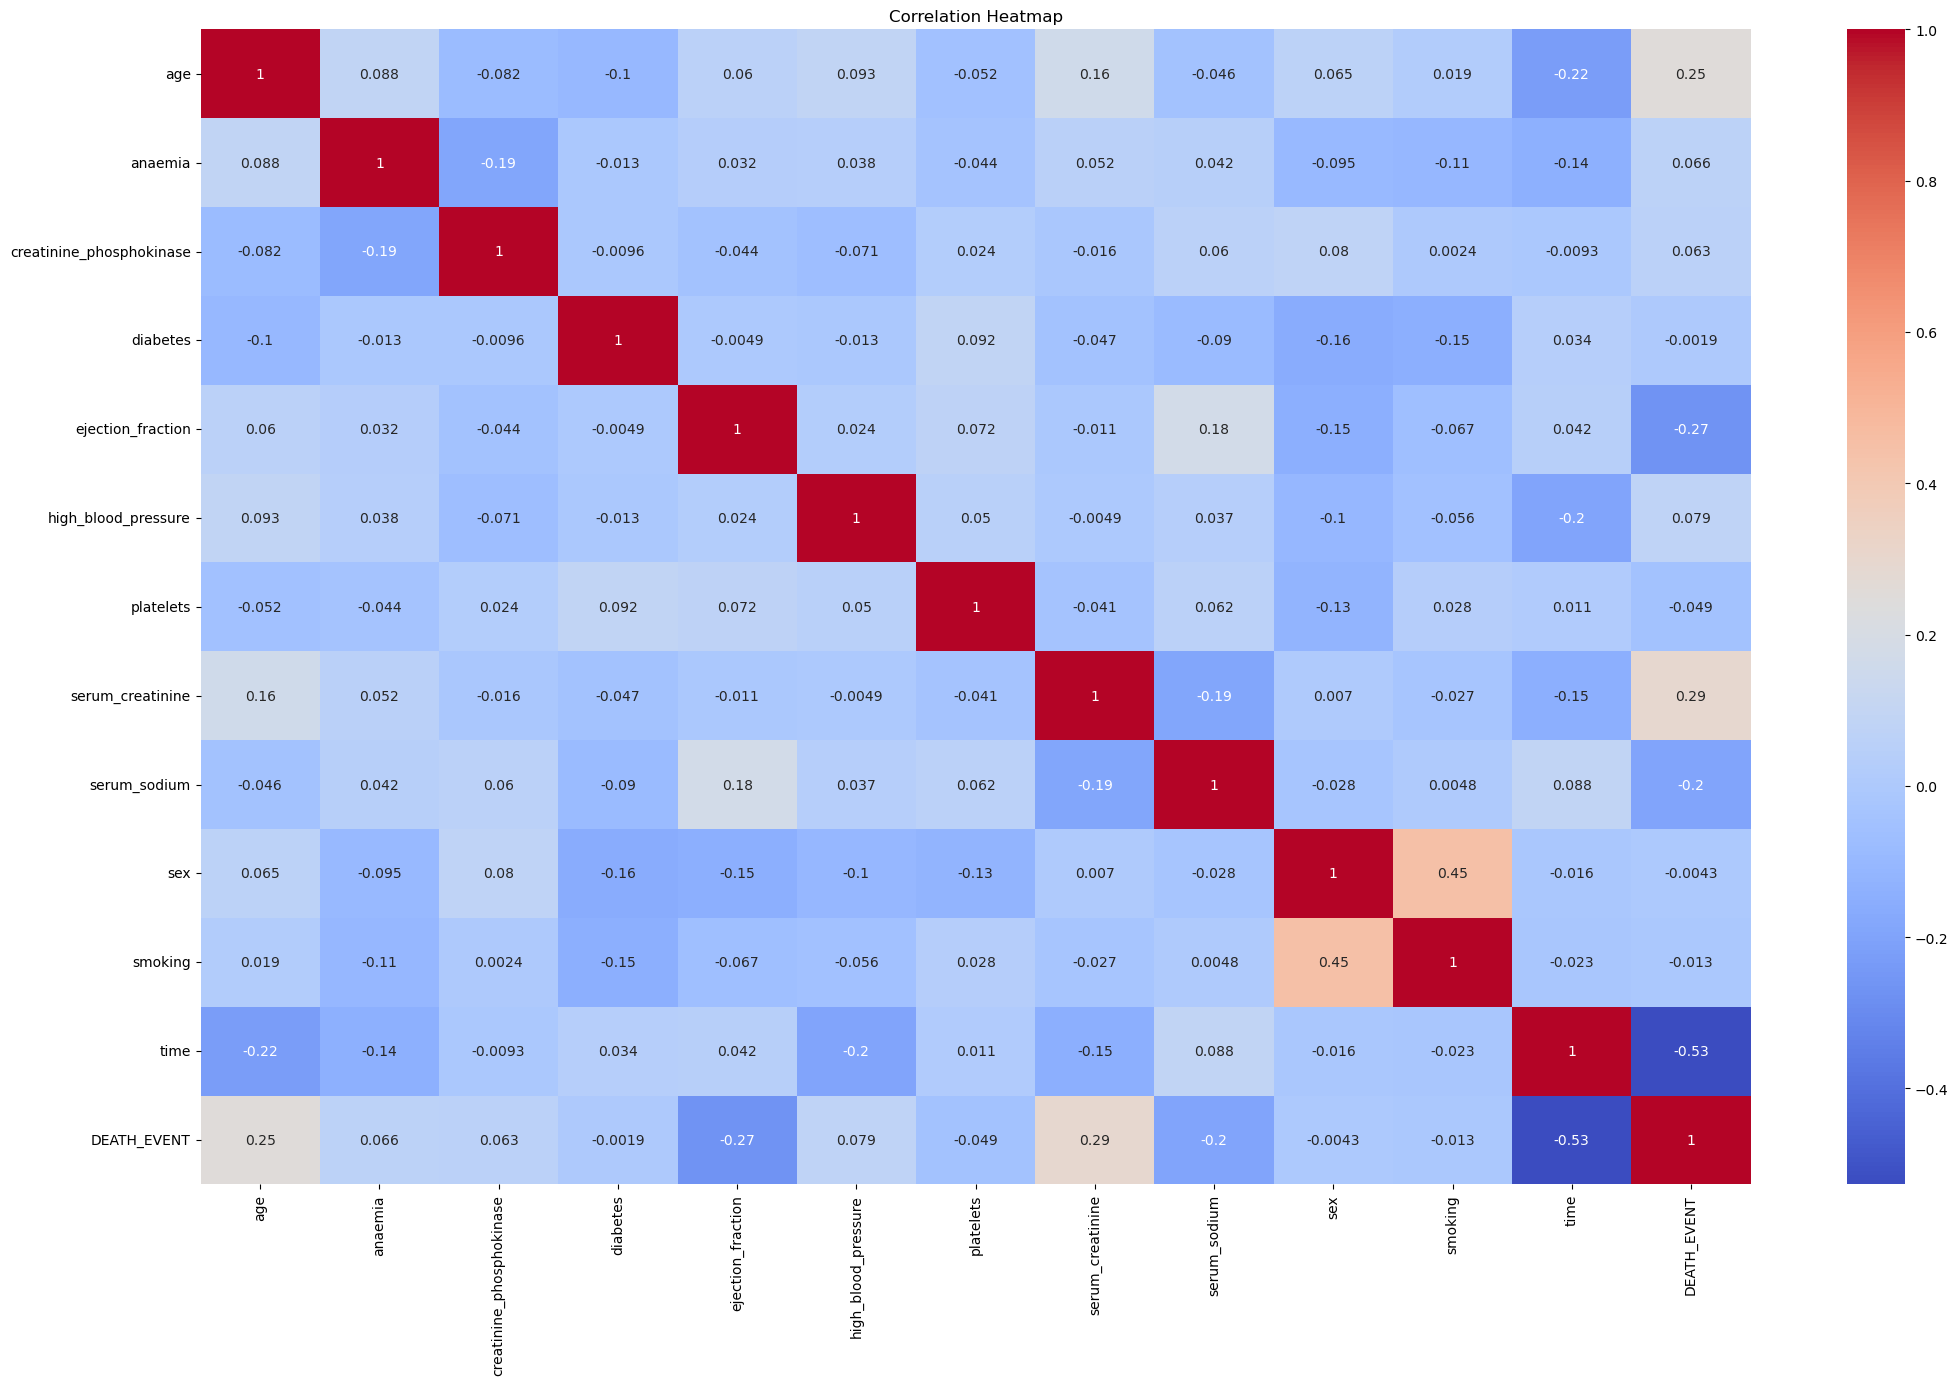

In [17]:
plt.figure(figsize=(25, 15))
correlation_matrix = hf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

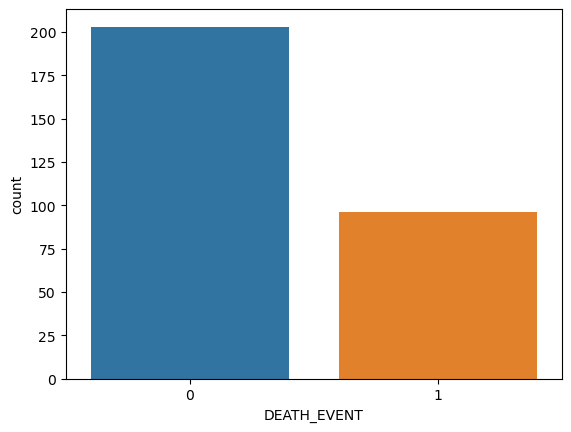

In [19]:
sns.countplot(x='DEATH_EVENT', data=hf)

<Axes: xlabel='smoking', ylabel='count'>

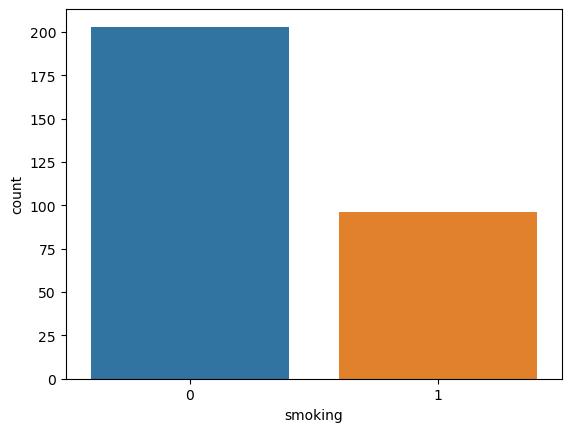

In [24]:
sns.countplot(x='smoking', data=hf)

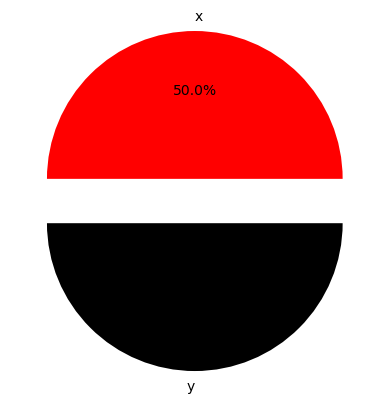

In [45]:
plt.pie([len(x), len(y)], 
labels=['x', 'y'], autopct='%.1f%%', colors=['red','black'], explode=(0.3, 0))
plt.show()

In [68]:
x = hf[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = hf['DEATH_EVENT']

In [18]:
model = Sequential()

model.add(LSTM(units=96, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 12, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 12, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 12, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 12, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [30]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [33]:
history=model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 51ms/step - loss: 0.5736 - accuracy: 0.7071 - val_loss: 0.4291 - val_accuracy: 0.9000
Epoch 2/100
8/8 [==============================] - 0s 45ms/step - loss: 0.5735 - accuracy: 0.6736 - val_loss: 0.6406 - val_accuracy: 0.7333
Epoch 3/100
8/8 [==============================] - 0s 51ms/step - loss: 0.6312 - accuracy: 0.6109 - val_loss: 0.3326 - val_accuracy: 0.9500
Epoch 4/100
8/8 [==============================] - 0s 48ms/step - loss: 0.5674 - accuracy: 0.7197 - val_loss: 0.4636 - val_accuracy: 0.9167
Epoch 5/100
8/8 [==============================] - 0s 45ms/step - loss: 0.5386 - accuracy: 0.7197 - val_loss: 0.2824 - val_accuracy: 0.9500
Epoch 6/100
8/8 [==============================] - 0s 44ms/step - loss: 0.6402 - accuracy: 0.7406 - val_loss: 0.2719 - val_accuracy: 0.9500
Epoch 7/100
8/8 [==============================] - 0s 52ms/step - loss: 0.6466 - accuracy: 0.8033 - val_loss: 0.1722 - val_accuracy: 0.9500
Epoch 8/100
8/8 [===

In [35]:
best_score = max(history.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")

Best Validation score is: 0.9833333492279053


In [36]:
best_score = max(history.history['accuracy'])
print(f"Best accuracy score is: {best_score}")

Best accuracy score is: 0.8410041928291321


In [38]:
model.save('Heart_Failure.h5')
print('Model Saved Successfully')

Model Saved Successfully


In [39]:
results = model.evaluate(x, y, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.38691
Test Accuracy: 85.28%


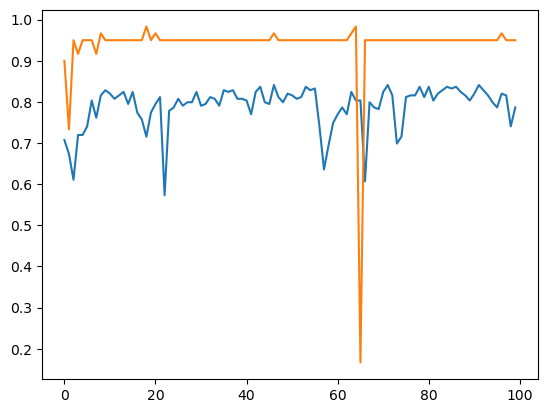

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

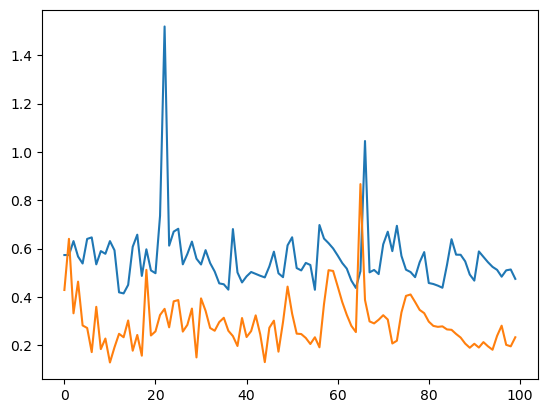

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [42]:
score=model.evaluate(x,y)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

10/10 [==============================] - 0s 14ms/step - loss: 0.3869 - accuracy: 0.8528
Loss:  0.38691219687461853
Accuracy:  0.8528428077697754


loss at epoch 1: 0.5736048817634583
loss at epoch 50: 0.6135525703430176


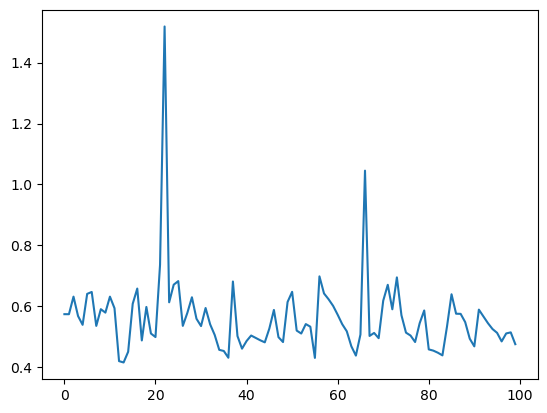

In [46]:
print(f"loss at epoch 1: {history.history['loss'][0]}")
print(f"loss at epoch 50: {history.history['loss'][49]}")
plt.plot(history.history['loss'])

accuracy at epoch 1: 0.7071129679679871
accuracy at epoch 50: 0.8200836777687073


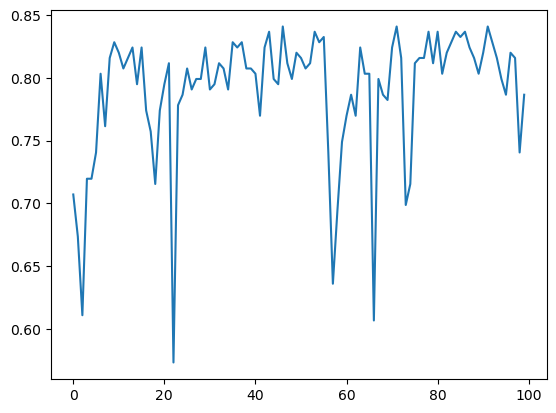

In [47]:
print(f"accuracy at epoch 1: {history.history['accuracy'][0]}")
print(f"accuracy at epoch 50: {history.history['accuracy'][49]}")
plt.plot(history.history['accuracy'])

In [49]:
model = load_model('Heart_Failure.h5')
print('Model Loaded Successfully')

Model Loaded Successfully


In [54]:
train_predict=model.predict(x)
test_predict=model.predict(y)

10/10 [==============================] - 0s 5ms/step


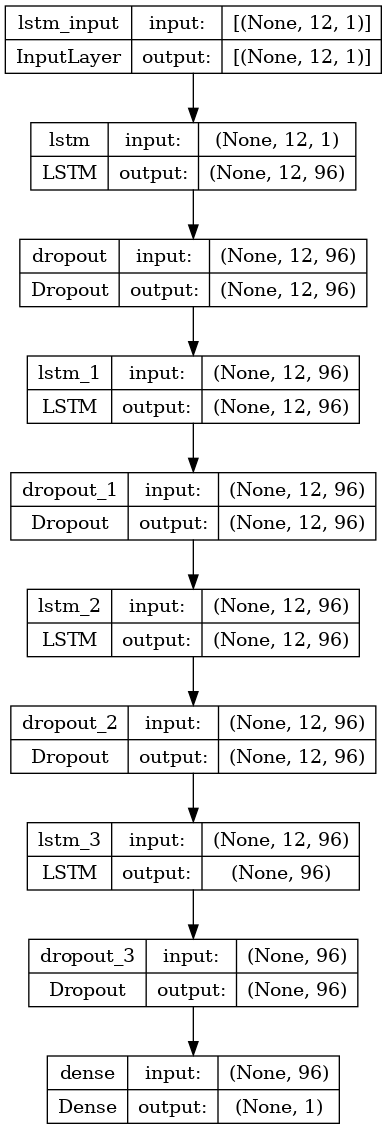

In [66]:
plot_model(model, to_file='Heart_Failure.h5.png', show_shapes=True, show_layer_names=True)

In [69]:
print('x \n' , x[:10])
print('y \n' , y[:10])

x 
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [79]:
print("train shape is:",x.shape)
print("test shape is:",y.shape)

train shape is: (299, 12)
test shape is: (299,)


In [80]:
model = XGBRegressor(n_estimator=1000,early_stopping_round=50)

model.fit(x,y)

[16:06:55] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=1000, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [81]:
model.score(x,y)

0.9999916099114389

In [84]:
def print_score(clf, xtrain, ytrain, xtest, ytest, train=True):
    if train:
        pred = clf.predict(xtrain)
        clf_report = pd.DataFrame(classification_report(ytrain, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytrain, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytrain, pred)}\n")
        
    elif train==False:
        pred = clf.predict(xtest)
        clf_report = pd.DataFrame(classification_report(ytest, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(ytest, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytest, pred)}\n")
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(xtrain, ytrain)

print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    150.0  59.0       1.0      209.0         209.0
_______________________________________________
Confusion Matrix: 
 [[150   0]
 [  0  59]]

Test Result:
Accuracy Score: 66.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.676923   0.640000  0.666667   0.658462      0.661744
recall      0.830189   0.432432  0.666667   0.631311      0.666667
f1-score    0.745763   0.516129  0.666667   0.630946      0.651358
support    53.000000  37.000000  0.666667  90.000000     90.000000
_______________________________________________
Confusion Matrix: 


In [85]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42) #criterion can be entropy
DecisionTreeClassifierModel.fit(xtrain, ytrain)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(xtrain, ytrain))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(xtest, ytest))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
print('----------------------------------------------------')

ypred = DecisionTreeClassifierModel.predict(xtest)
ypred_prob = DecisionTreeClassifierModel.predict_proba(xtest)
print('Predicted Value for DecisionTreeClassifierModel is : ' , ypred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , ypred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.9473684210526315
DecisionTreeClassifierModel Test Score is :  0.6888888888888889
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.         0.         0.05001525 0.         0.04341546 0.
 0.06249001 0.12123602 0.04151527 0.         0.         0.68132799]
----------------------------------------------------
Predicted Value for DecisionTreeClassifierModel is :  [1 0 0 1 0 0 0 1 0 0]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[0.11111111 0.88888889]
 [0.95774648 0.04225352]
 [0.95774648 0.04225352]
 [0.03125    0.96875   ]
 [0.95774648 0.04225352]
 [0.95774648 0.04225352]
 [0.95774648 0.04225352]
 [0.         1.        ]
 [1.         0.        ]
 [0.95774648 0.04225352]]


In [89]:
AccScore = accuracy_score(ytest, ypred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  62


In [87]:
F1Score = f1_score(ytest, ypred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.6888888888888889


In [92]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        53
           1       0.68      0.46      0.55        37

    accuracy                           0.69        90
   macro avg       0.69      0.65      0.66        90
weighted avg       0.69      0.69      0.67        90



In [95]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(xtrain, ytrain)

print_score(rf_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(rf_clf, xtrain, ytrain, xtest, ytest, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    150.0  59.0       1.0      209.0         209.0
_______________________________________________
Confusion Matrix: 
 [[150   0]
 [  0  59]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.746269   0.869565  0.777778   0.807917      0.796957
recall      0.943396   0.540541  0.777778   0.741968      0.777778
f1-score    0.833333   0.666667  0.777778   0.750000      0.764815
support    53.000000  37.000000  0.777778  90.000000     90.000000
_______________________________________________
Confusion Matrix: 


In [99]:
tr = DecisionTreeClassifier(random_state= 42)
tr.fit(xtrain, ytrain) 

DecisionTreeClassifier(random_state=42)

In [100]:
ypred = tr.predict(xtest)
accuracy_score(ypred, ytest)*100

67.77777777777779

In [101]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [102]:
ypred = lr.predict(xtest)
accuracy_score(ypred, ytest)*100

80.0

In [104]:
ac = neighbors.KNeighborsClassifier(n_neighbors=10)
ac.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

In [105]:
ypred = ac.predict(xtest)
accuracy_score(ypred, ytest)*100

57.77777777777777

In [106]:
rf = RandomForestClassifier(n_estimators=2)
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=2)

In [107]:
ypred = rf.predict(xtest)
accuracy_score(ypred, ytest)*100

65.55555555555556

56.716417910447745

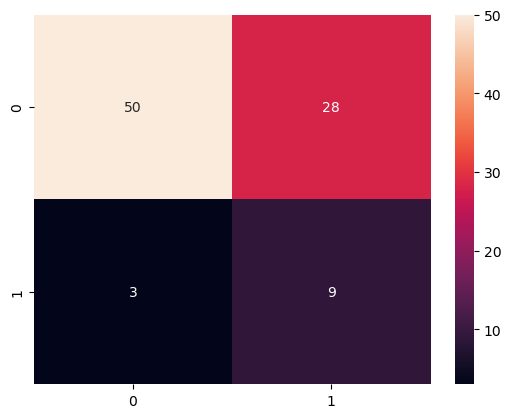

In [108]:
sns.heatmap(confusion_matrix(rf.predict(xtest), ytest),annot=True)
f1_score(tr.predict(xtest), ytest)*100